#Facial landmark detector
updated: 2024-01-22

In [2]:
# Clone the repository
!git clone --depth 1 https://github.com/IPHOS-RWU/3DMV

Cloning into '3DMV'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 58 (delta 6), reused 55 (delta 6), pack-reused 0
Receiving objects: 100% (58/58), 5.64 MiB | 19.70 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [1]:
import cv2
import dlib
import numpy
import imutils
from imutils import face_utils
import matplotlib.pyplot as plt

In [3]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

--2024-01-22 11:17:37--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  47.2MB/s    in 1.3s    

2024-01-22 11:17:38 (47.2 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [4]:
PREDICTOR_PATH = "shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(PREDICTOR_PATH)
detector = dlib.get_frontal_face_detector()

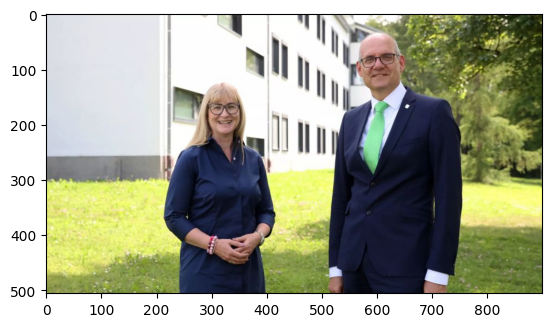

In [8]:
img = dlib.load_rgb_image("/content/3DMV/images/RWU.jpg")
plt.imshow(img)


In [9]:
image = imutils.resize(img, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# detect faces in the grayscale image
rects = detector(gray, 1)

In [10]:
dets = detector(img, 1)
print("Number of faces detected: {}".format(len(dets)))

Number of faces detected: 2


In [11]:
# loop over the face detections
for (i, rect) in enumerate(rects):
	# determine the facial landmarks for the face region, then
	# convert the facial landmark (x, y)-coordinates to a NumPy
	# array
	shape = predictor(gray, rect)
	shape = face_utils.shape_to_np(shape)
	# convert dlib's rectangle to a OpenCV-style bounding box
	# [i.e., (x, y, w, h)], then draw the face bounding box
	(x, y, w, h) = face_utils.rect_to_bb(rect)
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	# show the face number
	cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
	# loop over the (x, y)-coordinates for the facial landmarks
	# and draw them on the image
	for (x, y) in shape:
		cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

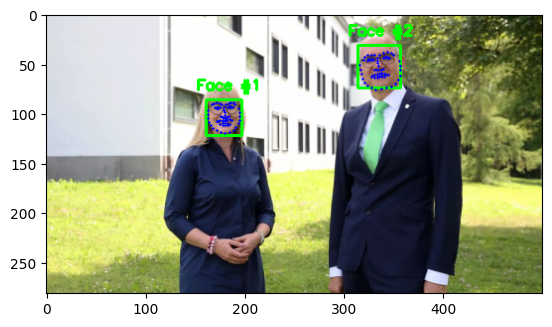

In [12]:
plt.imshow(image)